In [15]:
import numpy as np
import pandas as pd

train_df = pd.read_csv('./input/train.csv', index_col=0)
test_df = pd.read_csv('./input/test.csv', index_col=0)

In [3]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117d07da0>,
      dtype=object)

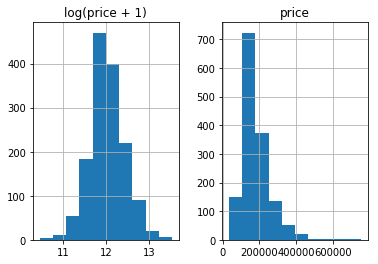

In [16]:
%matplotlib inline
prices = pd.DataFrame({"price":train_df["SalePrice"], "log(price + 1)":np.log1p(train_df["SalePrice"])})
prices.hist()

In [17]:
y_train = np.log1p(train_df.pop('SalePrice'))

In [18]:
all_df = pd.concat((train_df, test_df), axis=0)

In [19]:

all_df.shape


(2919, 79)

In [20]:
y_train.head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

In [21]:
all_df['MSSubClass'].dtypes

dtype('int64')

In [22]:
all_df['MSSubClass'] = all_df['MSSubClass'].astype(str)

In [23]:
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [24]:
all_dummy_df.isnull().sum().sort_values(ascending=False)

LotFrontage             486
GarageYrBlt             159
MasVnrArea               23
BsmtHalfBath              2
BsmtFullBath              2
BsmtFinSF2                1
GarageCars                1
TotalBsmtSF               1
BsmtUnfSF                 1
GarageArea                1
BsmtFinSF1                1
Condition1_Artery         0
Condition2_Feedr          0
Condition2_Artery         0
Neighborhood_Somerst      0
Neighborhood_StoneBr      0
Neighborhood_Timber       0
Neighborhood_Veenker      0
Condition1_Feedr          0
Condition1_RRAn           0
Condition1_RRNn           0
Condition1_RRNe           0
Condition1_Norm           0
Condition1_PosA           0
Neighborhood_SawyerW      0
Condition1_RRAe           0
Condition1_PosN           0
Neighborhood_OldTown      0
Neighborhood_Sawyer       0
Neighborhood_MeadowV      0
                       ... 
BsmtFinType2_ALQ          0
BsmtFinType2_BLQ          0
BsmtFinType2_GLQ          0
BsmtFinType2_LwQ          0
BsmtFinType2_Rec    

In [28]:
mean_cols = all_dummy_df.mean()
all_dummy_df = all_dummy_df.fillna(mean_cols)


In [29]:
all_dummy_df.isnull().sum().sum()

0

In [30]:
numeric_cols = all_df.columns[all_df.dtypes != 'object']
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [31]:
numeric_col_means = all_dummy_df.loc[:, numeric_cols].mean()
numeric_col_std = all_dummy_df.loc[:, numeric_cols].std()
all_dummy_df.loc[:, numeric_cols] = (all_dummy_df.loc[:, numeric_cols] - numeric_col_means) / numeric_col_std

In [32]:
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

In [33]:
dummy_train_df.shape, dummy_test_df.shape

((1460, 303), (1459, 303))

In [34]:
test_df.shape

(1459, 79)

In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [40]:
X_train = dummy_train_df.values
X_test = dummy_test_df.values

In [53]:
alphas = np.logspace(-3, 2, 50)
test_scores_ridge = []
for alpha in alphas:
    clf = Ridge(alpha)
    test_score_ridge = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores_ridge.append(np.mean(test_score_ridge))

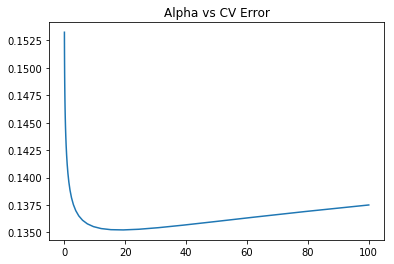

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(alphas, test_scores_ridge)
plt.title("Alpha vs CV Error");

In [56]:
c = alphas+test_scores_ridge
c

array([  0.15424562,   0.15448145,   0.15478233,   0.15516413,
         0.15564767,   0.1562601 ,   0.15703657,   0.15802222,
         0.1592747 ,   0.16086738,   0.16289336,   0.16547078,
         0.16874944,   0.17291946,   0.1782223 ,   0.18496477,
         0.19353684,   0.20443403,   0.21828556,   0.23588968,
         0.25825786,   0.28667036,   0.32274626,   0.36853223,
         0.42661524,   0.50026586,   0.59362005,   0.71190914,
         0.86175025,   1.05151279,   1.2917813 ,   1.59594053,
         1.98091572,   2.46810943,   3.08458737,   3.86457881,
         4.85137495,   6.0997303 ,   7.67890017,   9.6764825 ,
        12.20327673,  15.39942898,  19.44220442,  24.55581771,
        31.02386719,  39.2050625 ,  49.55311805,  62.64191593,
        79.19733351, 100.13750104])

In [46]:
from sklearn.ensemble import RandomForestRegressor
max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

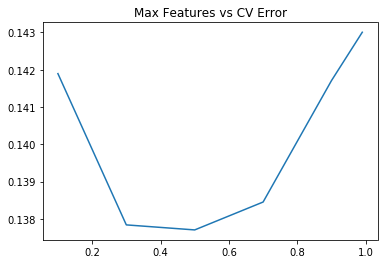

In [47]:
plt.plot(max_features, test_scores)
plt.title("Max Features vs CV Error");

In [48]:
from sklearn.ensemble import RandomForestRegressor
max_features = [.1, .3, .5, .7, .9, .99]
test_scores = []
for max_feat in max_features:
    clf = RandomForestRegressor(n_estimators=500, max_features=max_feat)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

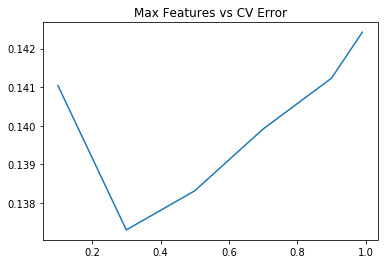

In [49]:
plt.plot(max_features, test_scores)
plt.title("Max Features vs CV Error");

In [51]:
c = np.vstack((alphas,test_scores))
c

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [57]:
ridge = Ridge(alpha=15)
rf = RandomForestRegressor(n_estimators=200, max_features=.5)

In [58]:
ridge.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [97]:
y_ridge = np.expm1(ridge.predict(X_test))
y_rf = np.expm1(rf.predict(X_test))

In [60]:
y_final = (y_ridge + y_rf) / 2

In [81]:
submission_df = pd.DataFrame(data= {'Id' : test_df.index, 'SalePrice': y_final})

In [83]:

submission_df.to_csv("house_price_1.csv")


In [84]:
#导入bagging Bagging把很多的小分类器放在一起，每个train随机的一部分数据，然后把它们的最终结果综合起来（多数投票制）。
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score

In [85]:
params = [1, 10, 15, 20, 25, 30, 40]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param, base_estimator=ridge)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

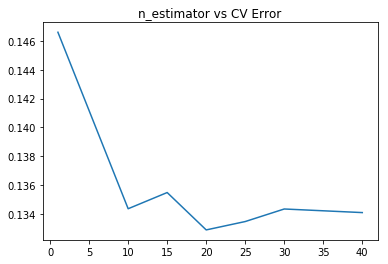

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error");

In [87]:
params = [10, 15, 20, 25, 30, 40, 50, 60, 70, 100]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

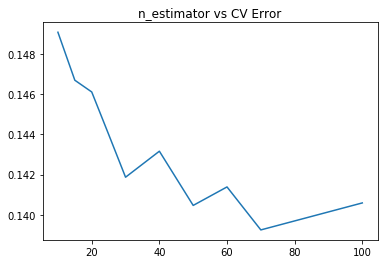

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error");

In [89]:
from sklearn.ensemble import AdaBoostRegressor
params = [10, 15, 20, 25, 30, 35, 40, 45, 50]
test_scores = []
for param in params:
    clf = AdaBoostRegressor(n_estimators=param, base_estimator=ridge)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

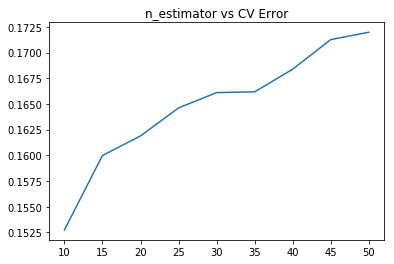

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title("n_estimator vs CV Error");

In [92]:
from xgboost import XGBRegressor
params = [1,2,3,4,5,6]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth=param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

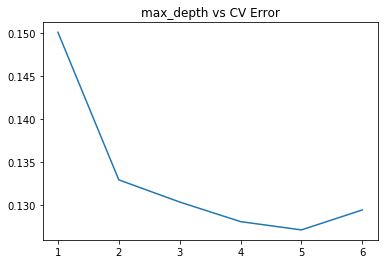

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title("max_depth vs CV Error");

In [94]:
clf = XGBRegressor(max_depth=5)
clf.fit(X_train, y_train)
y_clf = np.expm1(clf.predict(X_test))

In [95]:
y_clf

array([121317.99, 160514.98, 184872.67, ..., 167406.44, 118188.45,
       237732.66], dtype=float32)

In [96]:
submission_df = pd.DataFrame(data= {'Id' : test_df.index, 'SalePrice': y_clf})
submission_df.to_csv("house_price_2.csv")

In [98]:
submission_df = pd.DataFrame(data= {'Id' : test_df.index, 'SalePrice': y_rf})
submission_df.to_csv("./output/house_price_3_rf.csv")

In [99]:
submission_df = pd.DataFrame(data= {'Id' : test_df.index, 'SalePrice': y_ridge})
submission_df.to_csv("./output/house_price_4_ridge.csv")